### Notebook Imports and Packages

In [104]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Working with Data & a Real Cost Function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)}\big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)}\big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y}\big)^2 $$

In [105]:
# Make sample data
x_1 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]).reshape(7, 1) 
y_1 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1) 

In [106]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_1, y_1)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


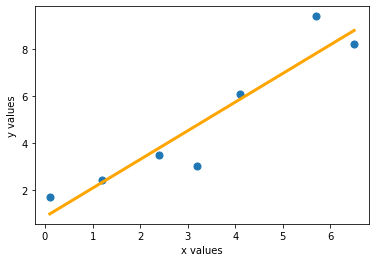

In [107]:
plt.scatter(x_1, y_1, s=50)
plt.plot(x_1, regr.predict(x_1), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')

plt.show()

In [108]:
# y_hat = theta0 + theta1x -> predicted value by our linear regression
y_hat = regr.intercept_[0] + regr.coef_[0][0] * x_1
print('Estimated values y_hat are:\n', y_hat)
print('In compartison, the actual y values are:\n', y_1)

def mse(y, y_hat):
    #mse_calc = sum((y - y_hat)**2)/y.size
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

print('Manually calculated MSE is:', mse(y_1, y_hat)[0])
print('MSE regression using manual calc is:', mean_squared_error(y_1, y_hat))
print('MSE regression is:', mean_squared_error(y_1, regr.predict(x_1)))

Estimated values y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In compartison, the actual y values are:
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]
Manually calculated MSE is: 0.9479655759794577
MSE regression using manual calc is: 0.9479655759794577
MSE regression is: 0.9479655759794577


### 3D Plot for the MSE Cost Function
#### Make data for thetas

In [109]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

#### Calculate MSE using nested loops

In [110]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_1
        plot_cost[i][j] = mse(y_1, y_hat)

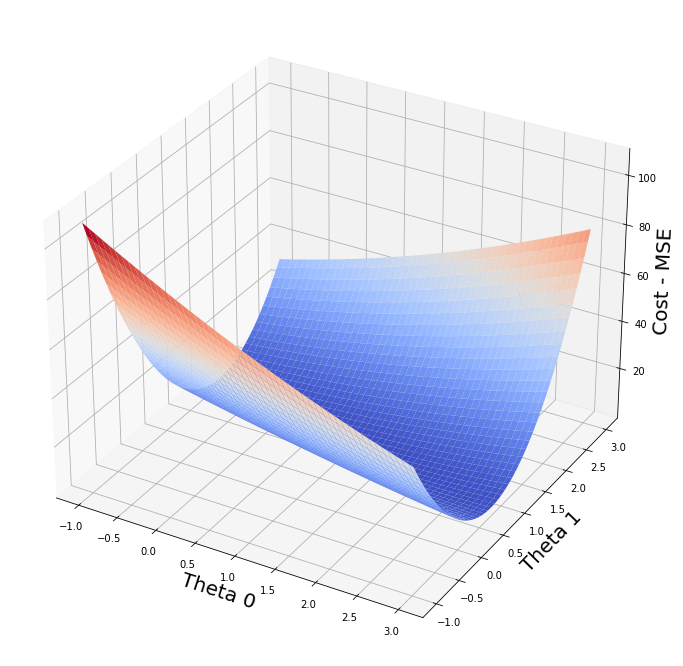

In [111]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.coolwarm)

plt.show()

In [112]:
print('Min value of plot_cost:', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]:', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]:', plot_t1[111][91])

Min value of plot_cost: 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91]: 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91]: 1.2311557788944723


### Partial Derivatives of MSE with respect to $\theta_0$ and $\theta_1$
#### $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$
#### $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$$

### MSE & Gradient Descent

In [119]:
# x values, y values, array of theta parameters(theta 0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [124]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_1, thetas[0] + thetas[1]*x_1)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_1, y_1, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals  = np.append(arr=mse_vals, values=mse(y_1, thetas[0] + thetas[1]*x_1))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_1, thetas[0] + thetas[1]*x_1))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


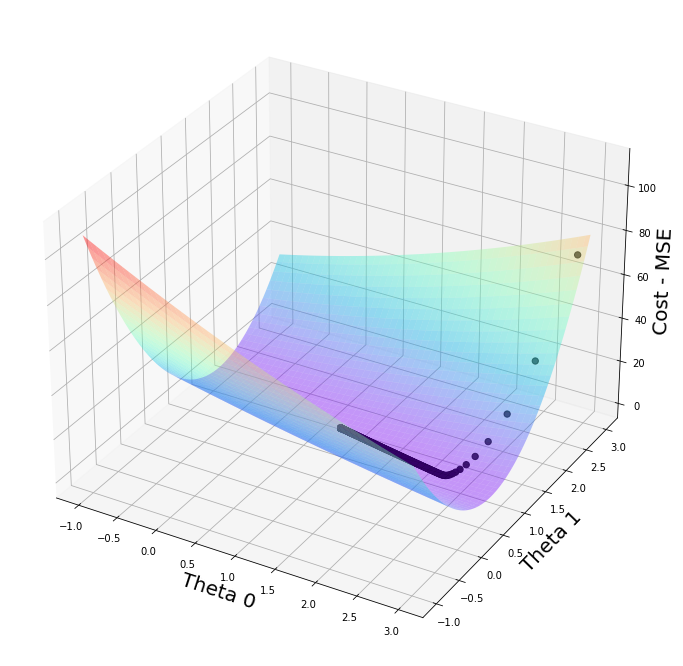

In [130]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=40, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)

plt.show()